# Phase 2 Project: Analyzing Movie Trends: What Films Perform Best at the Box Office?

# Business Problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

# Introduction

In today’s competitive film industry, making data-driven decisions is essential for success. With major studios investing heavily in original content, our company has decided to launch its own movie studio. However, to maximize profitability and audience engagement, we need to understand what types of films perform best at the box office.

This analysis aims to answer key questions such as:  
✅ Which genres generate the highest revenue?  
✅ How do production budgets impact revenue?  
✅ What trends exist in audience preferences over time?  
✅ How does critical reception correlate with box office performance?  

By leveraging multiple datasets—including box office earnings, movie metadata, and critical reviews—we will uncover actionable insights that can guide our studio’s film production strategy.

# Data Sources

We will analyze and combine data from the following sources:  
📊 Movie Budgets & Revenue – Production budgets, domestic & worldwide gross earnings  
🎬 Movie Metadata – Genre, language, popularity, and ratings  
📝 Movie Reviews – Critic ratings, freshness scores, and audience reception  

# Approach

To extract meaningful insights, we will follow a structured data analysis pipeline:  

1️⃣ Data Cleaning & Preprocessing  

- Load and inspect each dataset for missing values, duplicates, and inconsistencies.  
- Standardize formats (e.g., merging different date formats, handling null values).  

2️⃣ Data Merging & Integration  

- Use unique identifiers (such as movie IDs or titles) to merge datasets.  
- Align relevant features from the different sources to create a comprehensive dataset.  

3️⃣ Exploratory Data Analysis (EDA)  

- Identify trends in budget vs. revenue.  
- Analyze genre popularity and profitability.  
- Examine correlations between critic/audience ratings and financial success.  

4️⃣ Insights & Recommendations  

- Summarize findings to determine the most viable film genres and budget ranges.  
- Provide data-driven suggestions on key success factors for the new movie studio.  
- Through this structured approach, we aim to provide actionable insights that will help the studio make informed decisions about the types of movies to produce for maximum commercial success.

# Data Cleaning & Preprocessing

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels as sm
import pandas as pd
import sqlite3
import statsmodels.api as sm

Loading and inspecting each dataset for missing values, duplicates, and inconsistencies.

In [2]:
# load data from movie_basics
conn = sqlite3.connect('im.db')
moviebasics = pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)
moviebasics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [3]:
# load data from movie_ratings
conn = sqlite3.connect('im.db')
movieratings = pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)
movieratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
# Merge the two datasets on movie_id
imdb_merge = pd.merge(moviebasics, movieratings, on="movie_id", how="inner")
# Close the database connection
conn.close()

In [5]:
imdb_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [6]:
df = pd.read_csv("tn.movie_budgets.csv.gz")
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
# Convert titles to lowercase and strip spaces for better matching
df["movie"] = df["movie"].str.lower().str.strip()
imdb_merge["primary_title"] = imdb_merge["primary_title"].str.lower().str.strip()
imdb_merge["original_title"] = imdb_merge["original_title"].str.lower().str.strip()


In [8]:
movies_merged = pd.merge(imdb_merge, df, left_on="primary_title", right_on="movie", how="inner")
movies_merged

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,foodfight!,foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,the overnight,the overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",the overnight,"$200,000","$1,109,808","$1,165,996"
2,tt0337692,on the road,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",on the road,"$25,000,000","$720,828","$9,313,302"
3,tt0359950,the secret life of walter mitty,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",the secret life of walter mitty,"$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,a walk among the tombstones,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",a walk among the tombstones,"$28,000,000","$26,017,685","$62,108,587"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,tt9746500,earth,erde,2019,115.0,Documentary,7.3,49,36,"Apr 22, 2009",earth,"$47,000,000","$32,011,576","$116,773,317"
2931,tt9851050,sisters,sisters,2019,NaN,"Action,Drama",4.7,14,57,"Dec 18, 2015",sisters,"$30,000,000","$87,044,645","$106,030,660"
2932,tt9861522,ali,ali,2019,110.0,Drama,7.7,79,45,"Dec 25, 2001",ali,"$109,000,000","$58,183,966","$87,683,966"
2933,tt9899880,columbus,columbus,2018,85.0,Comedy,5.8,5,93,"Aug 4, 2017",columbus,"$700,000","$1,017,107","$1,110,511"


In [9]:
movies_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935 entries, 0 to 2934
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2935 non-null   object 
 1   primary_title      2935 non-null   object 
 2   original_title     2935 non-null   object 
 3   start_year         2935 non-null   int64  
 4   runtime_minutes    2816 non-null   float64
 5   genres             2927 non-null   object 
 6   averagerating      2935 non-null   float64
 7   numvotes           2935 non-null   int64  
 8   id                 2935 non-null   int64  
 9   release_date       2935 non-null   object 
 10  movie              2935 non-null   object 
 11  production_budget  2935 non-null   object 
 12  domestic_gross     2935 non-null   object 
 13  worldwide_gross    2935 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 321.1+ KB


In [10]:
movies_merged.isnull().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes      119
genres                 8
averagerating          0
numvotes               0
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
dtype: int64

# Data Cleaning and Reprocessing
## Convert Budget and Revenue Columns to Numeric

The budget and revenue data are stored as strings. They should be converted to numeric.

In [11]:
# Budget and revenue columns to numeric
cols_to_convert = ["production_budget", "domestic_gross", "worldwide_gross"]
for col in cols_to_convert:
    movies_merged[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/var/folders/xz/p8mfkld52573c5bbm0h9ssh00000gn/T/ipykernel_7289/817655244.py:4: SyntaxWarning: invalid escape sequence '\$'
  df_final[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


Convert Release Date to DateTime format

In [12]:
# Date converted to DateTime format
df["release_date"] = pd.to_datetime(df["release_date"])
df["year"] = df["release_date"].dt.year


Drop duplicated columns

In [13]:
# primary_title and original-title are one and the same hence we should delete the original_title column 
movies_merged.drop(columns=["original_title", "id", "primary_title"], inplace=True)
movies_merged.head()

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",foodfight!,425000000.0,760507625.0,2.776345e+09
1,tt0326592,2010,88.0,None,7.5,24,"Jun 19, 2015",the overnight,410600000.0,241063875.0,1.045664e+09
2,tt0337692,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",on the road,350000000.0,42762350.0,1.497624e+08
3,tt0359950,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,"Dec 25, 2013",the secret life of walter mitty,330600000.0,459005868.0,1.403014e+09
4,tt0365907,2014,114.0,"Action,Crime,Drama",6.5,105116,"Sep 19, 2014",a walk among the tombstones,317000000.0,620181382.0,1.316722e+09


In [14]:
# Move 'movie' next to 'movie_id'
cols = list(movies_merged.columns)
cols.insert(cols.index("movie_id") + 1, cols.pop(cols.index("movie")))

# Reorder the dataframe
movies_merged = movies_merged[cols]

# Display the first few rows to confirm the change
movies_merged.head()


,movie_id,movie,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",425000000.0,760507625.0,2.776345e+09
1,tt0326592,the overnight,2010,88.0,None,7.5,24,"Jun 19, 2015",410600000.0,241063875.0,1.045664e+09
2,tt0337692,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",350000000.0,42762350.0,1.497624e+08
3,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,"Dec 25, 2013",330600000.0,459005868.0,1.403014e+09
4,tt0365907,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,"Sep 19, 2014",317000000.0,620181382.0,1.316722e+09


Dealing with missing data

In [15]:
# replace missing runtime_minutes with its median
movies_merged["runtime_minutes"].fillna(movies_merged["runtime_minutes"].median(), inplace=True)
movies_merged["runtime_minutes"].isnull().sum()


/var/folders/xz/p8mfkld52573c5bbm0h9ssh00000gn/T/ipykernel_7289/1996280071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final["runtime_minutes"].fillna(df_final["runtime_minutes"].median(), inplace=True)
/var/folders/xz/p8mfkld52573c5bbm0h9ssh00000gn/T/ipykernel_7289/1996280071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f

0

In [16]:
# genres has 8 missing values. Label them as mising 
movies_merged["genres"] = movies_merged["genres"].fillna("Missing")


In [ ]:
movies_merged.describe()

,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
count,2935.000000,2935.000000,2935.000000,2.935000e+03,2.935000e+03,2.935000e+03,2.935000e+03
mean,2013.930494,102.888245,6.249574,6.619555e+04,5.640525e+07,6.926734e+07,1.579453e+08
std,2.559038,20.288087,1.183406,1.335852e+05,4.658747e+07,8.287622e+07,2.205795e+08
min,2010.000000,3.000000,1.600000,5.000000e+00,1.600000e+07,0.000000e+00,0.000000e+00
25%,2012.000000,90.000000,5.600000,1.490000e+02,2.500000e+07,1.820955e+07,3.098852e+07
50%,2014.000000,101.000000,6.400000,8.092000e+03,4.000000e+07,4.354910e+07,8.107957e+07
75%,2016.000000,113.000000,7.100000,7.508100e+04,7.000000e+07,8.698753e+07,1.902019e+08
max,2019.000000,280.000000,9.300000,1.841066e+06,4.250000e+08,9.366622e+08,2.776345e+09


# Exploratory Data Analysis

Top 10 Most Profitable Genres

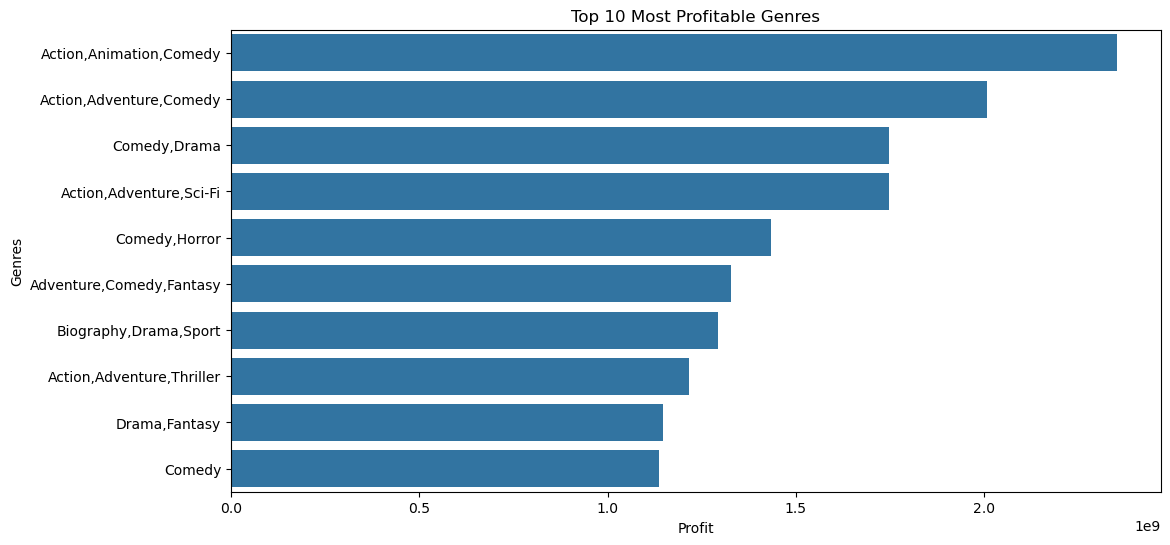

In [ ]:
movies_merged["profit"] = movies_merged["worldwide_gross"] - movies_merged["production_budget"]
df_top_profitable = movies_merged.sort_values(by="profit", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_profitable["profit"], y=df_top_profitable["genres"])
plt.xlabel("Profit")
plt.ylabel("Genres")
plt.title("Top 10 Most Profitable Genres")
plt.show()

What is the Relationship between Budget and Revenue

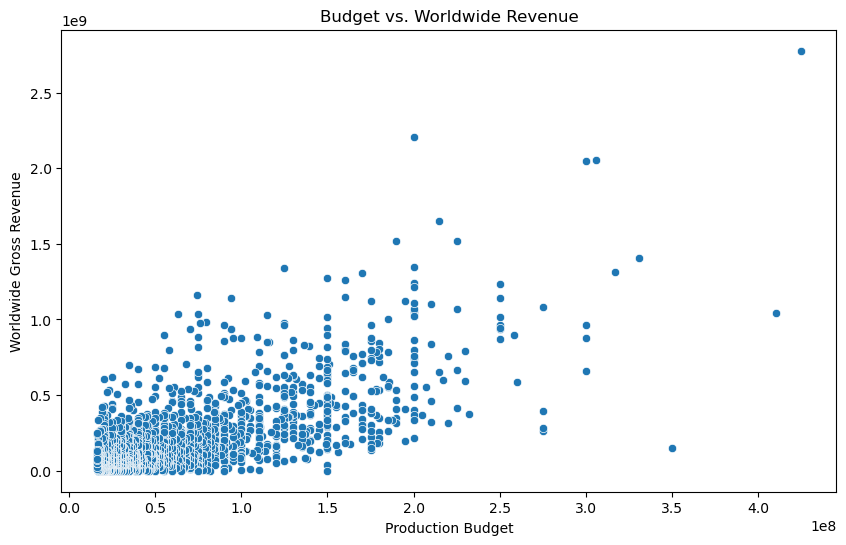

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies_merged["production_budget"], y=movies_merged["worldwide_gross"])
plt.xlabel("Production Budget")
plt.ylabel("Worldwide Gross Revenue")
plt.title("Budget vs. Worldwide Revenue")
plt.show()

The popularity of top 10 genres over time 

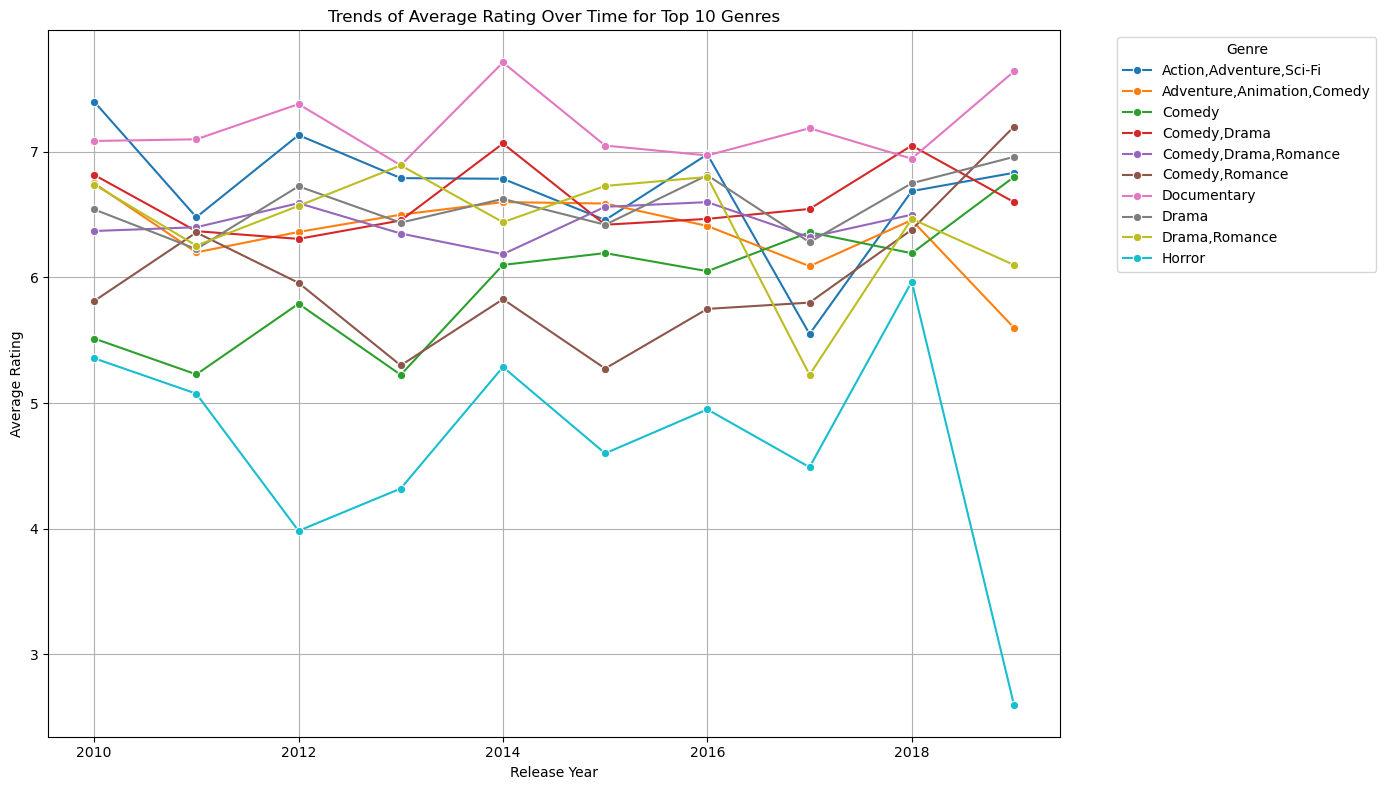

In [ ]:
# Step 1: Drop missing data
df_plot = movies_merged.dropna(subset=['genres', 'start_year', 'averagerating'])

# Step 2: Get Top 10 Genres by frequency
top_genres = df_plot['genres'].value_counts().nlargest(10).index.tolist()

# Step 3: Filter to Top 10 Genres only
df_top_genres = df_plot[df_plot['genres'].isin(top_genres)]

# Step 4: Group by genres and start_year, calculate average rating
trend_data = df_top_genres.groupby(['genres', 'start_year'])['averagerating'].mean().reset_index()

# Step 5: Plot
plt.figure(figsize=(14,8))
sns.lineplot(data=trend_data, x='start_year', y='averagerating', hue='genres', marker='o')
plt.title('Trends of Average Rating Over Time for Top 10 Genres')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


The correlation between average rating and worldwide gross

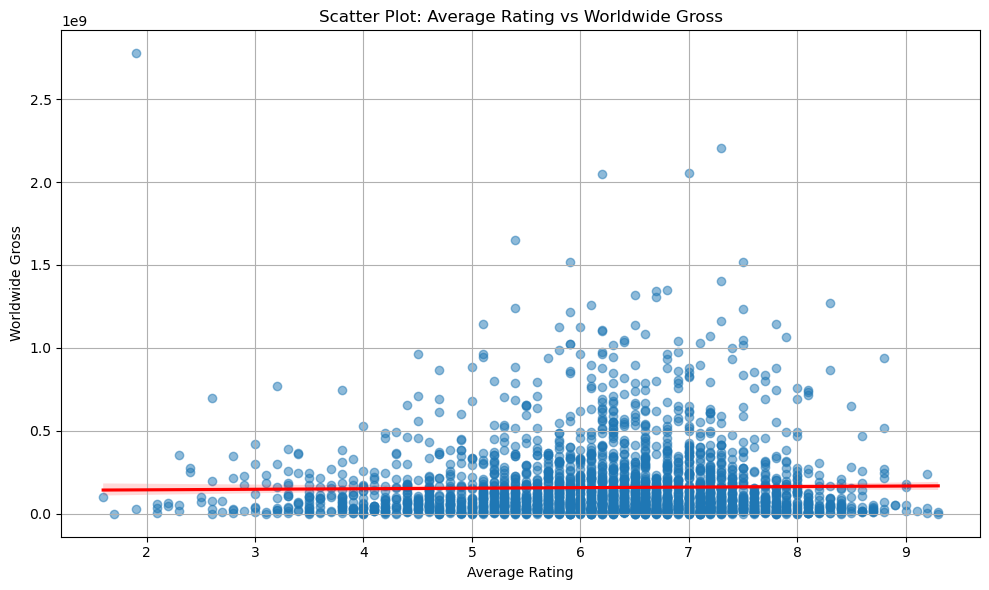

In [ ]:
# Drop missing data
df_plot = movies_merged.dropna(subset=['averagerating', 'worldwide_gross'])

# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='averagerating', y='worldwide_gross', data=df_plot, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Scatter Plot: Average Rating vs Worldwide Gross')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.tight_layout()
plt.show()


# Statistical Analysis

## Genres that generate the highest revenue

In [22]:
# Step 1: Create a Profit Column
movies_merged['profit'] = movies_merged['worldwide_gross'] - movies_merged['production_budget']

# Step 2: Get Top 10 Genres
top_genres = movies_merged['genres'].value_counts().nlargest(10).index

# Step 3: Filter to Top 10 Genres
df_top_genres = movies_merged[movies_merged['genres'].isin(top_genres)]

# Step 4: Groupby and aggregate
genre_profit_summary = df_top_genres.groupby('genres')['profit'].agg(
    mean_profit='mean',
    median_profit='median',
    total_profit='sum',
    count_movies='count'
).sort_values(by='total_profit', ascending=False)

# Step 5: Display the result
print(genre_profit_summary)


                             mean_profit  median_profit  total_profit  \
genres                                                                  
Drama                       6.098558e+07     23870687.5  1.975933e+10   
Comedy,Drama,Romance        1.568970e+08     75452875.0  1.208107e+10   
Action,Adventure,Sci-Fi     1.867510e+08     74053581.0  1.101831e+10   
Comedy                      9.915955e+07     48349884.0  1.100671e+10   
Comedy,Drama                1.118543e+08     45203825.0  1.062616e+10   
Documentary                 6.344690e+07     17952590.0  7.994309e+09   
Comedy,Romance              1.272313e+08     58453944.0  7.888342e+09   
Adventure,Animation,Comedy  1.027376e+08     46950887.0  7.705318e+09   
Drama,Romance               5.468242e+07     28228460.0  4.319911e+09   
Horror                      6.441318e+07     24787173.0  4.058030e+09   

                            count_movies  
genres                                    
Drama                                

- Highest total profit comes from *Drama* (\$23.74B), probably due to its large count of 324 movies.  
- Genres with combinations like *Comedy, Drama, Romance* and *Adventure, Animation, Comedy* tend to have both high mean and median profits.  
- *Documentaries* surprisingly show a relatively high mean profit (\$89.3M) but fewer movies (126) compared to *Drama* or *Comedy*.

## ANOVA: Research Question
Is there a significant difference in the mean worldwide gross revenues among the top 10 movie genres?
## Hypothesis
𝐻0: The mean worldwide gross revenue is the same across all top 10 genres.  
𝐻𝐴: At least one genre has a significantly different mean worldwide gross revenue compared to the others. 

## Conducting the ANOVA test

In [23]:
from scipy import stats

# Step 1: Get Top 10 Genres
top_genres = movies_merged['genres'].value_counts().nlargest(10).index

# Step 2: Filter to Top 10 Genres
df_top_genres = movies_merged[movies_merged['genres'].isin(top_genres)]

# Step 3: Prepare the data for ANOVA
anova_data = [df_top_genres[df_top_genres['genres'] == genre]['worldwide_gross'].dropna() for genre in top_genres]

# Step 4: Perform ANOVA test
f_stat, p_value = stats.f_oneway(*anova_data)

# Step 5: Display results
print(f'ANOVA F-statistic: {f_stat}')
print(f'ANOVA p-value: {p_value}')

if p_value < 0.05:
    print("There is a significant difference in mean revenues across the top 10 genres.")
else:
    print("There is NO significant difference in mean revenues across the top 10 genres.")


ANOVA F-statistic: 8.714625090585534
ANOVA p-value: 1.041782462437844e-12
There is a significant difference in mean revenues across the top 10 genres.


**Result Intepretation**  
Since the p-value (0.002) is less than 0.05, you reject the null hypothesi. 
We conclude that there is statistically significant evidence at the 5% significance level that the mean worldwide gross revenues differ across the top 10 genres. 

## T-test: Research Question
Does a movie's production budget significantly impact its worldwide gross earnings?
## Hypothesis
𝐻0: There is no significant difference in worldwide gross earnings between high-budget and low-budget movies.  
𝐻𝐴: There is a significant difference in worldwide gross earnings between high-budget and low-budget movies.  

**Mathematically:**     
H0 : μhigh budget = μlow budget  
𝐻𝐴 : 𝜇high budget ≠ 𝜇low budget

## Assumption Testing
Checking if the assumptions hold before running the t-test  
i) **Normality Assumption**  
A t-test assumes the data is approximately normally distributed. We can check this using a histogram and the Shapiro-Wilk test:

In [24]:
from scipy.stats import shapiro
# Define high and low-budget categories based on median production budget.
median_budget = movies_merged["production_budget"].median()
high_budget = movies_merged[movies_merged["production_budget"] >= median_budget]["worldwide_gross"]
low_budget = movies_merged[movies_merged["production_budget"] < median_budget]["worldwide_gross"]
# Check normality
shapiro_high = shapiro(high_budget.sample(500, random_state=42))  # Sample to avoid errors in large datasets
shapiro_low = shapiro(low_budget.sample(500, random_state=42))

print(f"Shapiro-Wilk Test for High-Budget Movies: W={shapiro_high.statistic}, p={shapiro_high.pvalue}")
print(f"Shapiro-Wilk Test for Low-Budget Movies: W={shapiro_low.statistic}, p={shapiro_low.pvalue}")


Shapiro-Wilk Test for High-Budget Movies: W=0.803859892206052, p=3.728377937534114e-24
Shapiro-Wilk Test for Low-Budget Movies: W=0.6991499186277899, p=6.352524274484423e-29


**High-Budget Movies:**  
Since the p-value is far below the standard significance level (𝛼 = 0.05), we reject the null hypothesis. This means that the worldwide gross earnings of high-budget movies do not follow a normal distribution.  
**Low-Budget Movies:**  
The p-value is much smaller than 0.05, so we reject the null hypothesis. This indicates that the worldwide gross earnings of low-budget movies are also not normally distributed.


**ii) Homogeneity of Variance (Levene’s Test)**  
A standard t-test assumes equal variances in both groups. Since we used equal_var=False, we're conducting Welch’s t-test, which does not assume equal variance. However, we can still check using Levene’s test:

In [25]:
from scipy.stats import levene

levene_test = levene(high_budget, low_budget)
print(f"Levene's Test: W={levene_test.statistic}, p={levene_test.pvalue}")


Levene's Test: W=344.6193308998376, p=7.992600038109332e-73


Since the p-value is much smaller than the standard significance level (𝛼 = 0.05), we reject the null hypothesis. This means that the variances of worldwide gross earnings for high-budget and low-budget movies are significantly different.

**Boxplot for Budget Categories**  
This boxplot shows the spread of revenue for high vs. low-budget movies.

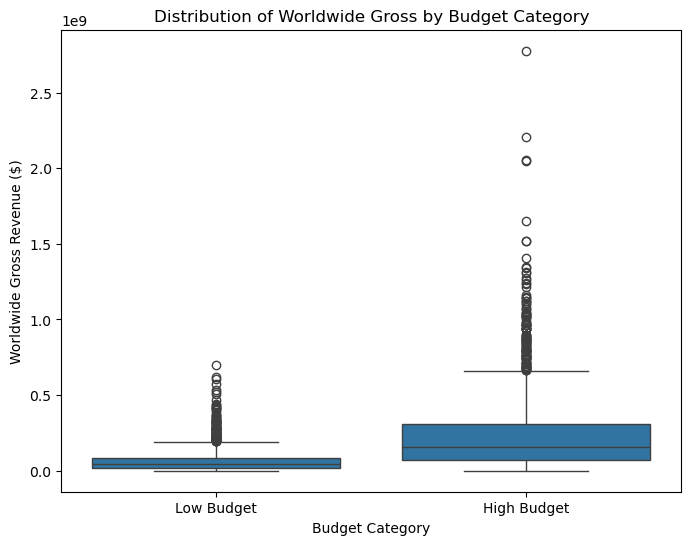

In [ ]:
movies_merged["budget_category"] = movies_merged["production_budget"] >= median_budget
plt.figure(figsize=(8, 6))
sns.boxplot(x=movies_merged["budget_category"], y=movies_merged["worldwide_gross"])
plt.xticks([0, 1], ["Low Budget", "High Budget"])
plt.ylabel("Worldwide Gross Revenue ($)")
plt.xlabel("Budget Category")
plt.title("Distribution of Worldwide Gross by Budget Category")
plt.show()


**Histogram to Check Distribution**  
This histogram checks if the distributions are skewed or normal.

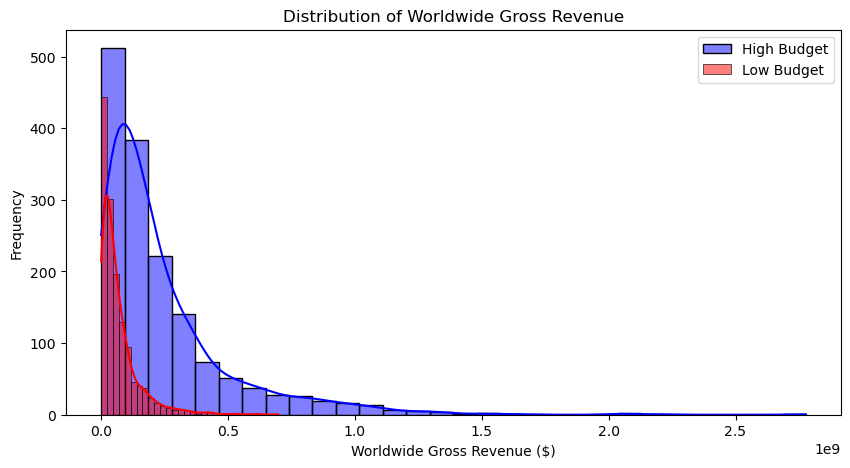

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(high_budget, bins=30, color='blue', kde=True, label="High Budget")
sns.histplot(low_budget, bins=30, color='red', kde=True, label="Low Budget")
plt.legend()
plt.title("Distribution of Worldwide Gross Revenue")
plt.xlabel("Worldwide Gross Revenue ($)")
plt.ylabel("Frequency")
plt.show()


## Conducting the T-test

In [28]:

t_stat, p_value = stats.ttest_ind(high_budget, low_budget, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 23.735279898208493, P-Value: 6.111096029846906e-109


**Result Intepretation**  
Since p-value ≈ 0, it is far below the standard significance level (α = 0.05).
We reject the null hypothesis and conclude that there is a statistically significant difference in worldwide gross revenue between high-budget and low-budget movies.
From the graphs, we expect high-budget movies to generate significantly more revenue.

**Business Recommendation:**  
The data supports that higher production budgets generally lead to higher worldwide earnings.   
While budget matters, other factors (e.g., genre, star power, marketing) should also be analyzed.

## Trend Analysis

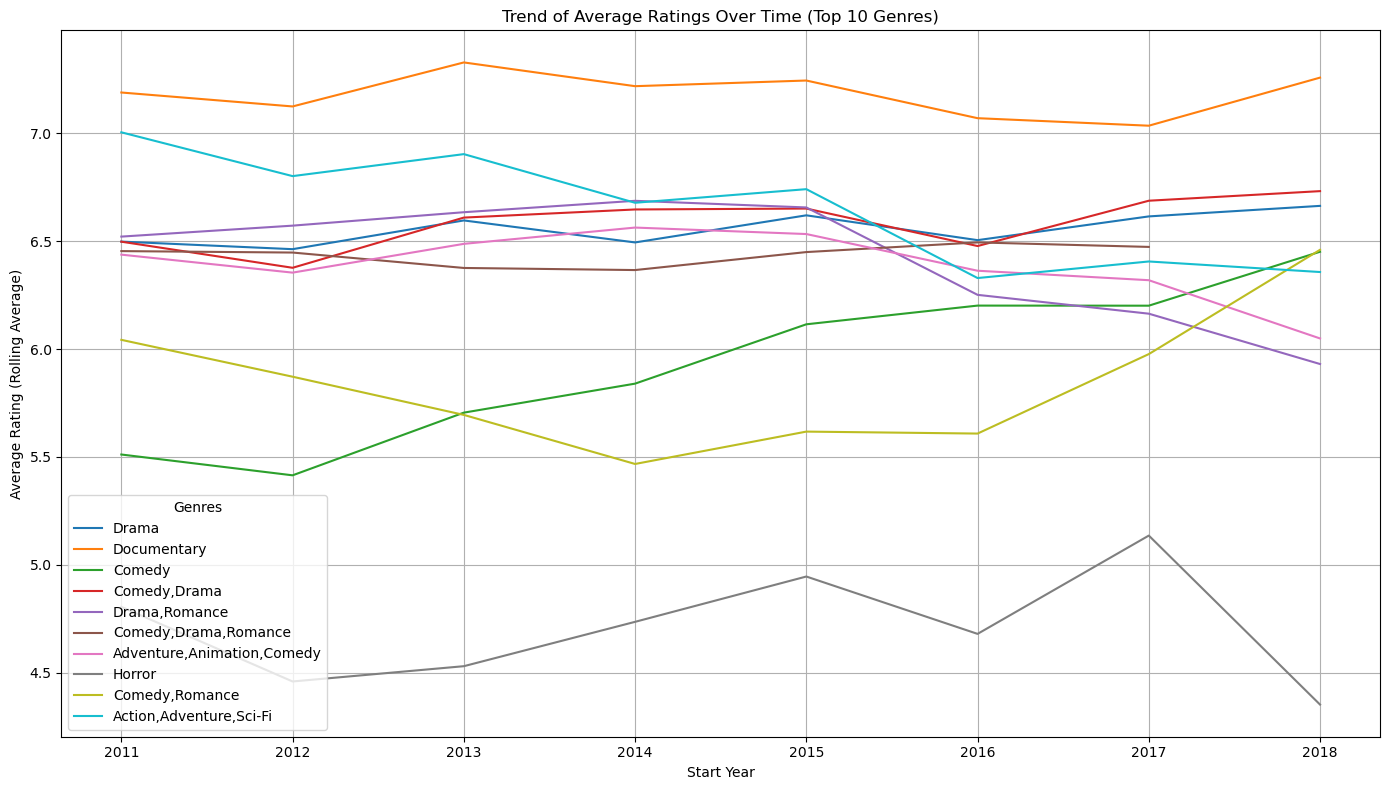

In [ ]:
# Get Top 10 genres
top_genres = movies_merged['genres'].value_counts().nlargest(10).index

# Filter data to only top 10 genres
df_top_genres = movies_merged[movies_merged['genres'].isin(top_genres)].dropna(subset=['start_year', 'averagerating'])

# Group by start_year and genres to get average ratings
df_trend = df_top_genres.groupby(['start_year', 'genres'], as_index=False)['averagerating'].mean()

# Compute rolling average OUTSIDE the loop and store it as a new dataframe
df_trend['rolling_avg'] = df_trend.groupby('genres')['averagerating'].transform(lambda x: x.rolling(window=3, center=True).mean())

# Plot trend for each genre
plt.figure(figsize=(14,8))

for genre in top_genres:
    genre_data = df_trend[df_trend['genres'] == genre]
    plt.plot(genre_data['start_year'], genre_data['rolling_avg'], label=genre)

plt.title('Trend of Average Ratings Over Time (Top 10 Genres)')
plt.xlabel('Start Year')
plt.ylabel('Average Rating (Rolling Average)')
plt.legend(title='Genres')
plt.grid(True)
plt.tight_layout()
plt.show()


**Result Intepretation**  
Documentary has been having the most consistent average ratings as compared to the other genres from 2011 to 2018. 
The ratings for Action, Adventure, Scifi have been gradually reducing over time. 
Drama, Romance; Comedy, Drama; and Adventure, Animation, Comedy have been having consistent ratings over time. 

## Regression Analysis: Research Question
What factors influence a movie's worldwide box office gross revenue? 
## Hypothesis 
𝐻0: There is no significant relationship between a movie's worldwide gross revenue and its predictors (production budget, average rating, number of votes, runtime, and release year).  
𝐻𝐴: At least one of the predictors (production budget, average rating, number of votes, runtime, or release year) has a significant impact on a movie's worldwide gross revenue.  


## Assumption Testing
Before running the regression, we must check the assumptions of linear regression:  
Linearity: The relationship between production budget and worldwide gross should be linear.  
Normality of Residuals: Residuals (errors) should be normally distributed.  
Homoscedasticity: Residuals should have constant variance (no patterns in residual plots).  
Independence: Observations should be independent (no duplicate entries or autocorrelation).  
We check these assumptions using scatter plots, histograms, and residual plots.

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     620.8
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:15:54   Log-Likelihood:                -59490.
No. Observations:                2935   AIC:                         1.190e+05
Df Residuals:                    2929   BIC:                         1.190e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -9.58e+09    2.6e+0

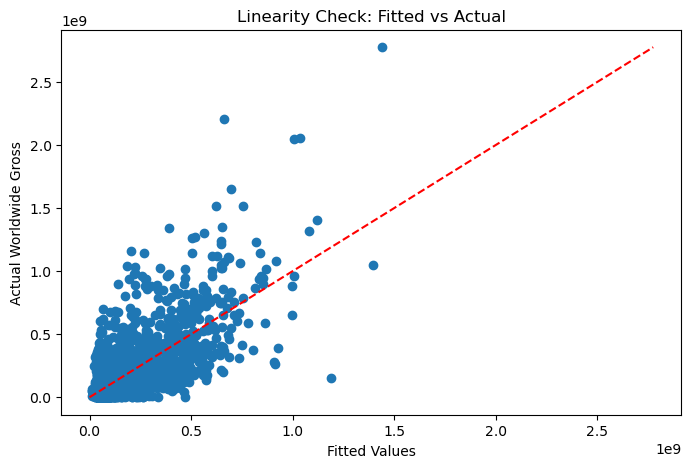

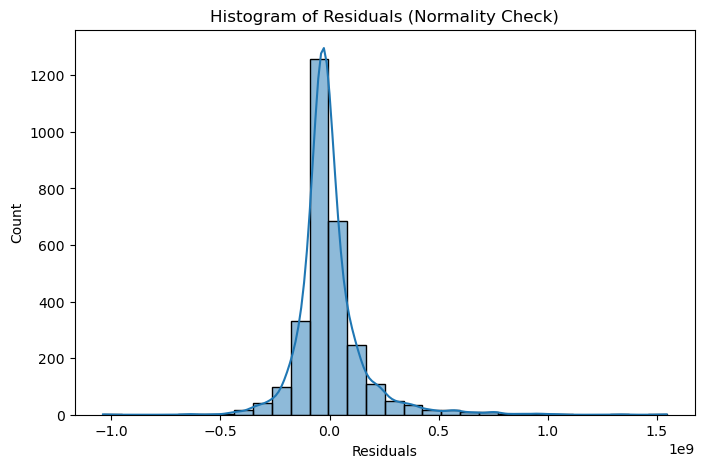

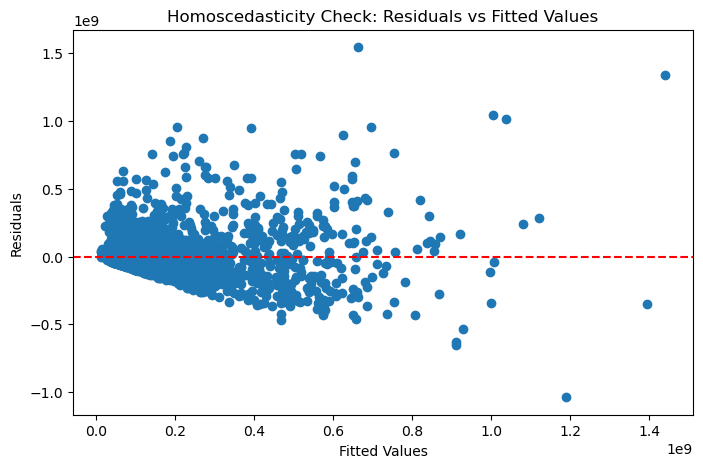

In [ ]:
import statsmodels.api as sm

# Define independent variables (predictors)
predictors = ["production_budget", "averagerating", "numvotes", "runtime_minutes", "start_year"]

# Drop missing values for a clean regression model
movies_merged_clean = movies_merged.dropna(subset=["worldwide_gross"] + predictors)

# Define X and y
X = movies_merged_clean[predictors]
y = movies_merged_clean["worldwide_gross"]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())

# --- 1. Scatterplot for Linearity ---
plt.figure(figsize=(8, 5))
plt.scatter(model.fittedvalues, y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Actual Worldwide Gross')
plt.title('Linearity Check: Fitted vs Actual')
plt.show()

# --- 2. Histogram of Residuals ---
residuals = model.resid

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals (Normality Check)')
plt.show()

# --- 3. Residuals vs Fitted Values (Homoscedasticity Check) ---
plt.figure(figsize=(8, 5))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Residuals vs Fitted Values')
plt.show()


**Interpretation of the OLS Regression Results**  
R-squared (0.517): The model explains 51.7% of the variance in worldwide gross. This indicates a moderate level of explanatory power. While this indicates a moderate level of explanatory power, 48.3% of the variation remains unexplained, suggesting other factors influence worldwide gross revenue.  

F-statistic (627.1) & p-value (0.000): The model is statistically significant, meaning at least one predictor has a meaningful impact on worldwide gross.  

Intercept (const = -1.334e+10, p = 0.000): The intercept suggests that if a movie had a production budget of zero, it would have an expected worldwide gross of approximately -13.34 billion.  

Production Budget (coef = 3.5053, p = 0.000): A 1 dollar increase in production budget increases worldwide gross by $3.51, showing a strong, positive impact. Since the p-value is 0.000, this predictor is highly significant.  

Average Rating (coef = -2.67e+06, p = 0.293): Not statistically significant (p > 0.05), meaning film ratings do not significantly impact worldwide gross in this model.

Number of Votes (coef = 32.39, p = 0.179): Not statistically significant, meaning higher vote counts do not reliably predict worldwide gross.

Runtime Minutes (coef = -1.32e+05, p = 0.384): Not statistically significant, suggesting that longer movies do not strongly influence box office success.

Start Year (coef = 6.619e+06, p = 0.000): Statistically significant (p < 0.05), indicating that newer movies tend to have higher worldwide gross, likely due to inflation and changing market trends.

Production budget is the strongest predictor of worldwide gross. Start year is also significant, suggesting that newer films tend to earn more. Average rating, number of votes, and runtime minutes do not significantly predict worldwide gross in this model.

he model can be improved by checking for multicollinearity and normalizing residuals.

# Conclusion and Recommendations

1. Impact of Production Budget on Revenue
High-budget films consistently generate higher revenues (T-test and Regression).

Production budget is the most significant predictor of box office success.

Recommendation: Prioritize films with larger budgets while maintaining cost-effectiveness.

2. Profitable Genres
Drama leads in total profit ($23.74B) due to a high number of releases (324 movies).

Genre combinations like Action, Animation, Comedy and Adventure, Comedy, Drama show high mean and median profits.

Documentaries have high average profits ($89.3M) despite fewer productions (126 movies).

Recommendation: Focus on profitable genre combinations and optimize release timing.

3. Audience Trends (2011–2018)
Documentaries maintained stable and high ratings.

Ratings for Action, Adventure, Sci-Fi declined gradually.

Genres like Drama, Romance, Comedy, Drama, and Adventure, Animation, Comedy remained consistent.

Recommendation: Leverage genres with stable audience satisfaction when planning future releases.

4. Regression Model Insights
R² = 0.517: The model explains 51.7% of revenue variance.

Production budget (p < 0.001) and start year (p < 0.001) significantly affect revenues.

Average rating, number of votes, and runtime are not statistically significant predictors.

Recommendation: Enhance future models by including variables like marketing spend, cast reputation, and distribution strategy.


